In [1]:
# pip install tensorflow

# Deep learning classifcation on Fashion MNIST 

## Overview 
### Fashion MNIST is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.
| Label       | Description |
| ----------- | ----------- |
| 0           | T-shirt/Top |
| 1           | Trouser     |
| 2           | Pullover    |
| 3           | Dress       |
| 4           | Coat        |
| 5           | Sandal      |
| 6           | Shirt       |
| 7           | Sneaker     |
| 8           | Bag         |
| 9           | Ankle Boot  |


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


- X_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data.

- y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (60000,) for the training data.

- X_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data.

- y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000,) for the test data.

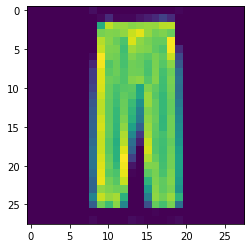

In [3]:
# lets see what the images look like
# The following shows a pants
import matplotlib.pyplot as plt
image = X_train[21, :].reshape((28, 28))

plt.imshow(image)
plt.show()  

# 1 Layer Convolutional Neural Network (CNN)

In [7]:
# Baseline simple neural network
# model = keras.Sequential(
#     [
#         keras.Input(shape=(28, 28)),
#         layers.Flatten(),
#         layers.Dense(128, activation="relu"), # 128 neurons
#         layers.Dense(10,activation='sigmoid')                  # 10 neurons as there are 10 types of fashion clothing

#     ]
# )
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
model = Sequential()
model.add(Dense(128, input_shape=(28,28), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))
model.summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 28, 128)           3712      
                                                                 
 flatten (Flatten)           (None, 3584)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                35850     
                                                                 
Total params: 39,562
Trainable params: 39,562
Non-trainable params: 0
_________________________________________________________________


### loss='sparse_categorical_crossentropy" is used for label encoded data

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2)
results=model.evaluate(X_test, y_test, batch_size=32, verbose=2)
print("test loss,", results[0], "test acc:", results[1])

Epoch 1/5
1875/1875 - 6s - loss: 0.4248 - accuracy: 0.8572 - 6s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 6s - loss: 0.4102 - accuracy: 0.8599 - 6s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 6s - loss: 0.3986 - accuracy: 0.8628 - 6s/epoch - 3ms/step
Epoch 4/5
1875/1875 - 5s - loss: 0.3911 - accuracy: 0.8651 - 5s/epoch - 3ms/step
Epoch 5/5
1875/1875 - 6s - loss: 0.3879 - accuracy: 0.8668 - 6s/epoch - 3ms/step
313/313 - 2s - loss: 0.7128 - accuracy: 0.8206 - 2s/epoch - 5ms/step
test loss, 0.7127870917320251 test acc: 0.8205999732017517


Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3975 - accuracy: 0.8650 - val_loss: 0.7178 - val_accuracy: 0.8371
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3855 - accuracy: 0.8669 - val_loss: 0.7017 - val_accuracy: 0.8312
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3754 - accuracy: 0.8701 - val_loss: 0.7509 - val_accuracy: 0.8297
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3746 - accuracy: 0.8716 - val_loss: 0.7611 - val_accuracy: 0.8314
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3745 - accuracy: 0.8732 - val_loss: 0.7829 - val_accuracy: 0.8275
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3654 - accuracy: 0.8724 - val_loss: 0.8219 - val_accuracy: 0.8201
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3629 - accuracy: 0.8738 - val_loss: 0.8487 - val_accuracy:

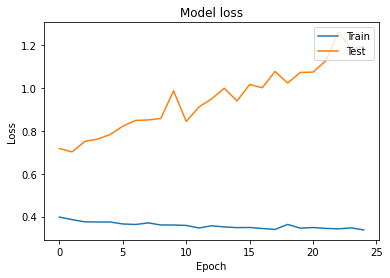

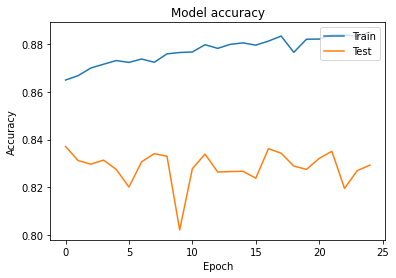

In [19]:
# Train your model and save its history
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
  
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

h_callback = model.fit(X_train, y_train, epochs = 25,
               validation_data=(X_test, y_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])


# Deeper CNNs

# Improvements for CNN

## Batch size training with and without

## With Hyperparameter tuning


## Autoencoding and denoisning

## Final Results + conclusion ( need more data etc?)

# Trying out RNN


# Deeper RNNs

# Batch size training with and without

# With Hyperparameter tuning


# Final Results + conclusion ( need more data etc?)